In [126]:
import pandas as pd
from matplotlib import pyplot as plt

In [127]:
discografia = pd.read_csv('thecure_discography.csv', sep = ',')

In [128]:
import seaborn as sns

### Excluindo colunas que não serão utilizadas

In [129]:
discografia.drop(['Unnamed: 0', 'album_uri', 'album_img', 'track_uri'], axis = 1, inplace = True)

### Legenda 
**track_popularity:** O valor estará entre 0 e 100, sendo 100 o mais popular.

**duration_ms**: A duração da faixa em milissegundos.

**valence:** Uma medida de 0,0 a 1,0 que descreve a positividade musical transmitida por uma faixa.

**danceability:** A capacidade de dança descreve o quão adequada uma faixa é para dançar com base em uma combinação de elementos musicais, incluindo tempo, estabilidade do ritmo, força da batida e regularidade geral. Um valor de 0,0 é menos dançável e 1,0 é mais dançante.

**energy:** Representa uma medida perceptiva de intensidade e atividade (de 0,0 a 1,0).

**acousticness:** Uma medida de confiança de 0,0 a 1,0 para saber se a faixa é acústica.

**loudness:** O volume geral de uma faixa em decibéis (faixa típica entre -60 e 0 db).

**speechiness.** A fala detecta a presença de palavras faladas em uma faixa. Quanto mais exclusivamente semelhante à fala for a gravação, mais próximo de 1,0 será o valor do atributo.

**instrumentalness:** Prevê se uma faixa não contém vocais. Quanto mais próximo o valor da instrumentalidade estiver de 1,0, maior será a probabilidade de a faixa não conter nenhum conteúdo vocal.

**liveness:** Detecta a presença de um público na gravação. Um valor acima de 0,8 fornece uma grande probabilidade de que a faixa esteja ao vivo.

**key_mode:** A chave em que está a faixa.

# Verificando os 10 primeiros registros

In [130]:
discografia.head(10)

,album_name,album_release_date,album_release_year,album_popularity,track_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,key_mode,track_popularity
0,Pornography,1982-05-03,1982-05-03,34,One Hundred Years - Remastered Version,0.436,0.881,G,-5.998,major,0.0439,0.001230,0.5090,0.1080,0.262,132.590,401000,4,G major,33
1,Pornography,1982-05-03,1982-05-03,34,A Short Term Effect - Remastered Version,0.516,0.836,C,-5.872,major,0.0319,0.001710,0.1650,0.1360,0.649,116.566,262493,4,C major,28
2,Pornography,1982-05-03,1982-05-03,34,The Hanging Garden - Remastered Version,0.420,0.889,C,-5.860,major,0.0393,0.004020,0.4880,0.0795,0.634,135.421,274240,4,C major,35
3,Pornography,1982-05-03,1982-05-03,34,Siamese Twins - Remastered Version,0.772,0.523,D,-9.788,major,0.0364,0.000298,0.7950,0.2820,0.752,94.194,328360,4,D major,34
4,Pornography,1982-05-03,1982-05-03,34,The Figurehead - Remastered Version,0.655,0.842,A#,-5.349,minor,0.0264,0.001250,0.6420,0.1100,0.727,110.370,375173,4,A# minor,28
5,Pornography,1982-05-03,1982-05-03,34,A Strange Day - Remastered Version,0.603,0.964,A,-7.245,minor,0.0430,0.000109,0.0801,0.1190,0.564,112.798,303960,4,A minor,31
6,Pornography,1982-05-03,1982-05-03,34,Cold - Remastered Version,0.473,0.832,A#,-5.841,minor,0.0283,0.091600,0.4980,0.1010,0.238,100.881,266573,4,A# minor,31
7,Pornography,1982-05-03,1982-05-03,34,Pornography - Remastered Version,0.423,0.829,A#,-9.534,major,0.0739,0.435000,0.5300,0.5170,0.205,123.997,387867,4,A# major,25
8,The Top,1984-04-30,1984-04-30,28,Shake Dog Shake - Remastered,0.353,0.914,C,-5.474,major,0.0438,0.011400,0.0119,0.3210,0.158,166.084,296387,4,C major,22
9,The Top,1984-04-30,1984-04-30,28,Birdmad Girl - Remastered,0.760,0.798,B,-8.482,minor,0.0332,0.002720,0.0002,0.0753,0.818,119.770,245413,4,B minor,20


## Verificando os dados estatísticos das colunas

In [131]:
discografia.describe()

,album_popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,track_popularity
count,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,2.230000e+02,223.000000,223.000000
mean,33.215247,0.520341,0.768982,-8.486027,0.049394,0.149261,0.233470,0.403882,0.503273,129.404668,2.919564e+05,3.955157,22.941704
std,10.637700,0.135878,0.157281,3.847060,0.031209,0.182739,0.295339,0.326814,0.210575,29.393823,1.185817e+05,0.281178,10.092867
min,11.000000,0.175000,0.284000,-24.265000,0.023300,0.000030,0.000000,0.038900,0.042200,74.919000,1.404670e+05,1.000000,0.000000
25%,28.000000,0.431000,0.674500,-11.356000,0.032450,0.012700,0.001285,0.117500,0.343500,108.812000,2.163630e+05,4.000000,17.000000
50%,34.000000,0.528000,0.805000,-7.727000,0.040500,0.067400,0.060600,0.300000,0.506000,128.105000,2.624930e+05,4.000000,22.000000
75%,38.000000,0.608000,0.900000,-5.750500,0.051400,0.218000,0.457000,0.694500,0.658000,150.101500,3.443530e+05,4.000000,28.000000
max,52.000000,0.848000,0.998000,-1.378000,0.267000,0.759000,0.933000,1.000000,0.960000,204.468000,1.286600e+06,5.000000,62.000000


# Criando as funções

In [132]:
def media(variavel):
  media_album = discografia.groupby('album_name').mean()[variavel].to_frame().reset_index()
  media_album = media_album.sort_values(variavel, ascending = False)
  return media_album

In [133]:
def plotar(titulo, x, y, labelx, labely, variavel):
    dataset = media(variavel)
    grafico = sns.barplot(x = x, y = y, data = dataset, palette = 'Blues_d')
    grafico.figure.set_size_inches(12,6)
    grafico.set_title(titulo, fontsize = 18)
    grafico.set_xlabel(labelx, fontsize = 12)
    grafico.set_ylabel(labely, fontsize = 12)
    grafico = grafico

In [134]:
def top_musicas_sup(variavel1):
  max_musica = discografia[['track_name', 'album_name', variavel1]]
  max_musica = max_musica.sort_values(variavel1, ascending = False)
  max_musica = max_musica.head(10)
  return max_musica

In [135]:
def top_musicas_inf(variavel2):
  min_musica = discografia[['track_name', 'album_name', variavel2]]
  min_musica = min_musica.sort_values(variavel2, ascending = True)
  min_musica = min_musica.head(10)
  return min_musica

# Índice de presença de público (liveness)

### Média de índice de presença de público por álbum

In [136]:
media('liveness')

,album_name,liveness
8,Paris,0.980417
10,Show,0.829889
1,Bestival Live 2011,0.825100
3,Concert - The Cure Live,0.747200
6,Kiss Me Kiss Me Kiss Me,0.338290
5,Hypnagogic States,0.301900
14,Wild Mood Swings,0.286521
11,The Cure,0.255964
13,The Top,0.246745
15,Wish,0.245667


### Gráfico da média do índice de presença de público por álbum

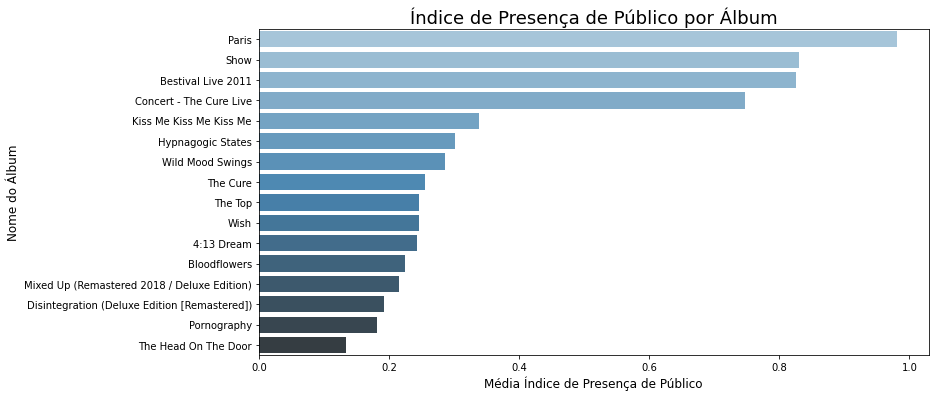

In [137]:
plotar('Índice de Presença de Público por Álbum', 'liveness', 'album_name', 'Média Índice de Presença de Público', 'Nome do Álbum', 'liveness')

### Top 10 músicas com maior índice de presença de público

In [138]:
top_musicas_sup('liveness')

,track_name,album_name,liveness
130,Charlotte Sometimes - Live Paris Version,Paris,1.000
211,The Walk - Bestival Live 2011,Bestival Live 2011,0.997
125,In Your House - Live Paris Version,Paris,0.993
131,Close To Me - Live Paris Version,Paris,0.992
122,At Night - Live Paris Version,Paris,0.991
220,One Hundred Years - Bestival Live 2011,Bestival Live 2011,0.988
217,Primary - Bestival Live 2011,Bestival Live 2011,0.988
36,10:15 Saturday Night - New Version / Live Vers...,Concert - The Cure Live,0.988
121,One Hundred Years - Live Paris Version,Paris,0.987
222,Disintegration - Bestival Live 2011,Bestival Live 2011,0.984


### Top 10 músicas com menor índice de presença de público

In [139]:
top_musicas_inf('liveness')

,track_name,album_name,liveness
88,Lullaby - Extended Mix,Mixed Up (Remastered 2018 / Deluxe Edition),0.0389
58,Hot Hot Hot !!! - 2006 Remastered Version,Kiss Me Kiss Me Kiss Me,0.0426
94,Pictures Of You - Extended Dub Mix,Mixed Up (Remastered 2018 / Deluxe Edition),0.0543
73,Lullaby,Disintegration (Deluxe Edition [Remastered]),0.0550
99,Let's Go To Bed - Extended Mix 1982,Mixed Up (Remastered 2018 / Deluxe Edition),0.0551
109,High,Wish,0.0594
90,Fascination Street - Extended Mix,Mixed Up (Remastered 2018 / Deluxe Edition),0.0596
89,Close To Me - Closer Mix,Mixed Up (Remastered 2018 / Deluxe Edition),0.0602
177,Anniversary,The Cure,0.0656
163,Bare,Wild Mood Swings,0.0710


# Valência (valence)

### Média de valência por álbum

In [140]:
media('valence')

,album_name,valence
12,The Head On The Door,0.728900
7,Mixed Up (Remastered 2018 / Deluxe Edition),0.661900
6,Kiss Me Kiss Me Kiss Me,0.558050
13,The Top,0.550750
14,Wild Mood Swings,0.507571
9,Pornography,0.503875
15,Wish,0.495000
0,4:13 Dream,0.479515
5,Hypnagogic States,0.477667
4,Disintegration (Deluxe Edition [Remastered]),0.467750


### Gráfico da média de valência por álbum

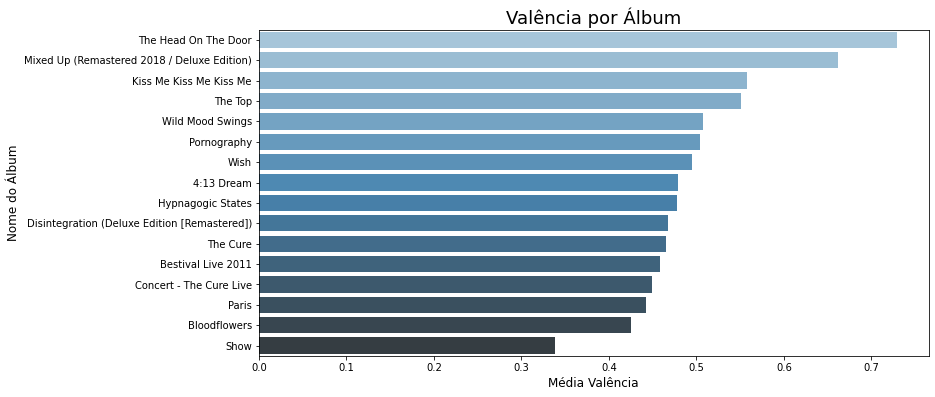

In [141]:
plotar('Valência por Álbum', 'valence', 'album_name', 'Média Valência', 'Nome do Álbum', 'valence')

### Top 10 músicas com maior valência

In [142]:
top_musicas_sup('valence')

,track_name,album_name,valence
44,Close To Me,The Head On The Door,0.960
101,Close To Me - Extended Mix 1985,Mixed Up (Remastered 2018 / Deluxe Edition),0.948
26,Throw Your Foot [Garden /Eden Studios RS&AA De...,The Top,0.944
43,The Baby Screams,The Head On The Door,0.882
131,Close To Me - Live Paris Version,Paris,0.881
13,The Caterpillar - Remastered Version,The Top,0.870
193,Freakshow,4:13 Dream,0.869
93,A Forest - Tree Mix,Mixed Up (Remastered 2018 / Deluxe Edition),0.864
27,Happy The Man [Garden /Eden Studios RS&AA Demo...,The Top,0.864
55,Hey You !!! - 2006 Remastered Version,Kiss Me Kiss Me Kiss Me,0.864


### Top 10 músicas com menor valência

In [143]:
top_musicas_inf('valence')

,track_name,album_name,valence
32,Give Me It - Live Version (1984),Concert - The Cure Live,0.0422
201,The Scream,4:13 Dream,0.0447
75,Prayers For Rain,Disintegration (Deluxe Edition [Remastered]),0.1080
66,The Kiss [RS Home Demo 3/86] [Instrumental],Kiss Me Kiss Me Kiss Me,0.1120
220,One Hundred Years - Bestival Live 2011,Bestival Live 2011,0.1240
68,Plainsong,Disintegration (Deluxe Edition [Remastered]),0.1250
77,Disintegration,Disintegration (Deluxe Edition [Remastered]),0.1250
11,Give Me It - Remastered,The Top,0.1290
17,The Top - Remastered,The Top,0.1330
188,Exploding Head Syndrome - 4 Single Remix by 65...,Hypnagogic States,0.1410


# Índice de partes cantadas (speechiness)

### Média de partes cantadas por álbum

In [144]:
media('speechiness')

,album_name,speechiness
5,Hypnagogic States,0.078467
0,4:13 Dream,0.078423
3,Concert - The Cure Live,0.059970
10,Show,0.054150
14,Wild Mood Swings,0.052629
11,The Cure,0.050555
7,Mixed Up (Remastered 2018 / Deluxe Edition),0.050140
6,Kiss Me Kiss Me Kiss Me,0.049265
1,Bestival Live 2011,0.046835
13,The Top,0.046370


### Gráfico da média de partes cantadas por álbum

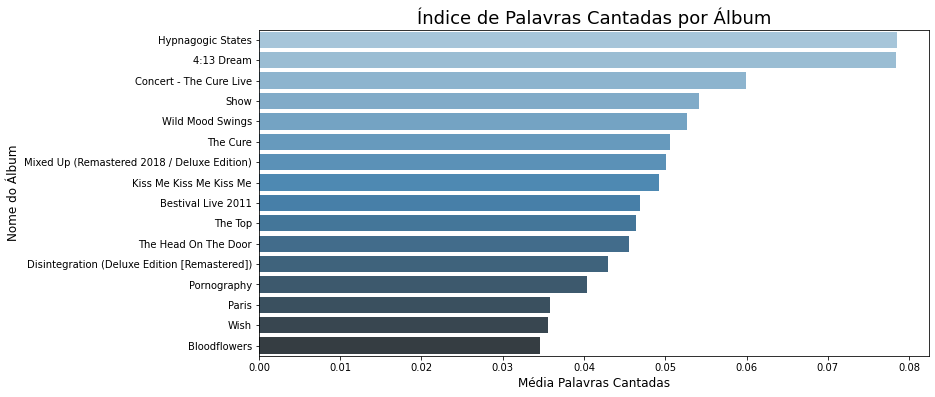

In [145]:
plotar('Índice de Palavras Cantadas por Álbum', 'speechiness', 'album_name', 'Média Palavras Cantadas', 'Nome do Álbum', 'speechiness')

### Top 10 músicas com mais partes cantadas

In [146]:
top_musicas_sup('speechiness')

,track_name,album_name,speechiness
66,The Kiss [RS Home Demo 3/86] [Instrumental],Kiss Me Kiss Me Kiss Me,0.267
201,The Scream,4:13 Dream,0.248
202,It's Over,4:13 Dream,0.168
11,Give Me It - Remastered,The Top,0.161
101,Close To Me - Extended Mix 1985,Mixed Up (Remastered 2018 / Deluxe Edition),0.134
200,Sleep When I'm Dead,4:13 Dream,0.133
189,The Only One - Remix 65 by 65 Days Of Static,Hypnagogic States,0.130
197,Switch,4:13 Dream,0.123
44,Close To Me,The Head On The Door,0.123
151,Club America,Wild Mood Swings,0.113


### Top 10 músicas com menos partes cantadas

In [147]:
top_musicas_inf('speechiness')

,track_name,album_name,speechiness
15,The Empty World - Remastered,The Top,0.0233
23,Piggy In The Mirror [Garden /Eden Studios RS&A...,The Top,0.0236
170,The Loudest Sound,Bloodflowers,0.0239
54,The Snakepit - 2006 Remastered Version,Kiss Me Kiss Me Kiss Me,0.0250
51,If Only Tonight We Could Sleep - 2006 Remaster...,Kiss Me Kiss Me Kiss Me,0.0257
78,Homesick,Disintegration (Deluxe Edition [Remastered]),0.0258
81,Pictures Of You [RS Home Demo (instrumental)-0...,Disintegration (Deluxe Edition [Remastered]),0.0263
4,The Figurehead - Remastered Version,Pornography,0.0264
140,"Trust - Live At The Palace, Auburn Hills, Mich...",Show,0.0264
75,Prayers For Rain,Disintegration (Deluxe Edition [Remastered]),0.0270


# Dançabilidade (danceability)

### Média de Dançabilidade por Álbum

In [148]:
media('danceability')

,album_name,danceability
12,The Head On The Door,0.640600
7,Mixed Up (Remastered 2018 / Deluxe Edition),0.626650
13,The Top,0.594250
1,Bestival Live 2011,0.575400
5,Hypnagogic States,0.569833
9,Pornography,0.537250
14,Wild Mood Swings,0.530286
2,Bloodflowers,0.498333
6,Kiss Me Kiss Me Kiss Me,0.498050
11,The Cure,0.491545


### Gráfico da Média de Dançabilidade por Álbum

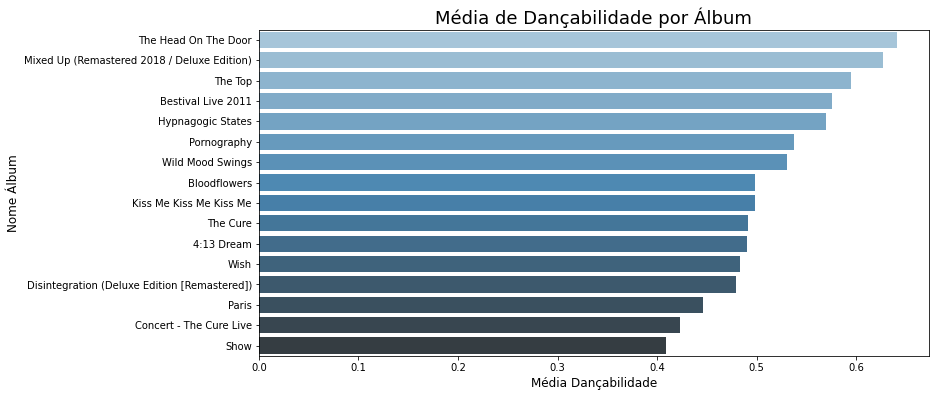

In [149]:
plotar('Média de Dançabilidade por Álbum', 'danceability', 'album_name', 'Média Dançabilidade', 'Nome Álbum', 'danceability')

### Top 10 músicas com maior dançabilidade

In [150]:
top_musicas_sup('danceability')

,track_name,album_name,danceability
17,The Top - Remastered,The Top,0.848
99,Let's Go To Bed - Extended Mix 1982,Mixed Up (Remastered 2018 / Deluxe Edition),0.828
24,Birdmad Girl [Garden /Eden Studios RS&AA Demo ...,The Top,0.806
41,Six Different Ways,The Head On The Door,0.781
3,Siamese Twins - Remastered Version,Pornography,0.772
95,Hot Hot Hot!!! - Extended Mix,Mixed Up (Remastered 2018 / Deluxe Edition),0.772
187,The Perfect Boy - Remix 4 by Patrick Stump / P...,Hypnagogic States,0.770
27,Happy The Man [Garden /Eden Studios RS&AA Demo...,The Top,0.762
96,The Caterpillar - Flicker Mix,Mixed Up (Remastered 2018 / Deluxe Edition),0.762
9,Birdmad Girl - Remastered,The Top,0.760


### Top 10 músicas com menor dançabilidade

In [151]:
top_musicas_inf('danceability')

,track_name,album_name,danceability
203,Plainsong - Bestival Live 2011,Bestival Live 2011,0.175
32,Give Me It - Live Version (1984),Concert - The Cure Live,0.207
86,Esten [Band Demo (instrumental)-09/88],Disintegration (Deluxe Edition [Remastered]),0.220
133,"Open - Live At The Palace, Auburn Hills, Michigan",Show,0.223
124,Apart - Live Paris Version,Paris,0.230
190,Underneath The Stars,4:13 Dream,0.231
148,"Cut - Live At The Palace, Auburn Hills, Michigan",Show,0.242
83,Homesick [Band Rehearsal (instrumental)-06/88],Disintegration (Deluxe Edition [Remastered]),0.250
119,End,Wish,0.258
37,Killing An Arab - New Version / Live Version (...,Concert - The Cure Live,0.263


Observando o gráfico de dançabilidade, podemos ver que, apesar de possuir o maior índice em relação aos demais, o álbum "The Head On The Door" possui apenas uma música no Top 10 geral de músicas com os maiores índices de dançabilidade. 
Ao olhar para as demais músicas desse álbum, pode-se observar uma certa regularidade dos índices, ou seja, apesar de apenas uma música se encontrar no Top 10, o álbum conta com outras músicas com bons índices de dançabilidade, fazendo com que sua média se mantenha elevada, tornando o "The Head On The Door" no álbum mais "dançável" do The Cure.

# Índice Instrumental (instrumentalness)



### Média do índice instrumental por álbum

In [152]:
media('instrumentalness')

,album_name,instrumentalness
4,Disintegration (Deluxe Edition [Remastered]),0.539580
9,Pornography,0.463387
7,Mixed Up (Remastered 2018 / Deluxe Edition),0.329865
13,The Top,0.281363
8,Paris,0.268283
6,Kiss Me Kiss Me Kiss Me,0.223575
12,The Head On The Door,0.210142
1,Bestival Live 2011,0.207517
5,Hypnagogic States,0.194343
10,Show,0.172449


### Gráfico da média do índice instrumental por álbum



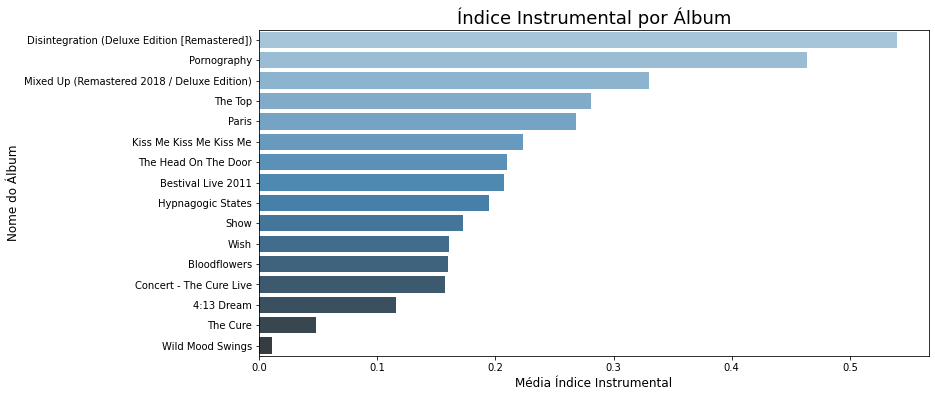

In [153]:
plotar('Índice Instrumental por Álbum', 'instrumentalness', 'album_name', 'Média Índice Instrumental', 'Nome do Álbum', 'instrumentalness')

### Top 10 músicas com maior índice instrumental

In [154]:
top_musicas_sup('instrumentalness')

,track_name,album_name,instrumentalness
100,Just One Kiss - Extended Mix 1982,Mixed Up (Remastered 2018 / Deluxe Edition),0.933
81,Pictures Of You [RS Home Demo (instrumental)-0...,Disintegration (Deluxe Edition [Remastered]),0.931
132,"Tape - Live At The Palace, Auburn Hills, Michigan",Show,0.903
71,Lovesong,Disintegration (Deluxe Edition [Remastered]),0.898
140,"Trust - Live At The Palace, Auburn Hills, Mich...",Show,0.896
67,The Perfect Girl [Beethoven St. Studio Demo 6/...,Kiss Me Kiss Me Kiss Me,0.884
86,Esten [Band Demo (instrumental)-09/88],Disintegration (Deluxe Edition [Remastered]),0.880
84,Fear Of Ghosts [Band Rehearsal (instrumental)-...,Disintegration (Deluxe Edition [Remastered]),0.874
93,A Forest - Tree Mix,Mixed Up (Remastered 2018 / Deluxe Edition),0.873
80,Prayers For Rain [RS Home Demo (instrumental)-...,Disintegration (Deluxe Edition [Remastered]),0.858


### Top 10 músicas com menor índice instrumental

In [155]:
top_musicas_inf('instrumentalness')

,track_name,album_name,instrumentalness
117,Cut,Wish,0.0
187,The Perfect Boy - Remix 4 by Patrick Stump / P...,Hypnagogic States,0.0
198,The Perfect Boy,4:13 Dream,0.0
199,This. Here And Now. With You,4:13 Dream,0.0
179,alt.end,The Cure,0.0
176,The End Of The World,The Cure,0.0
141,"Doing The Unstuck - Live At The Palace, Auburn...",Show,0.0
143,"Let's Go To Bed - Live At The Palace, Auburn H...",Show,0.0
14,Piggy In The Mirror - Remastered,The Top,0.0
154,Strange Attraction,Wild Mood Swings,0.0


Analisando esse índice, vemos que os álbuns "Disintegration" e "Pornography" destoam dos demais, que possuem uma certa semelhança, mostrando que no geral, as músicas do The Cure possuem curtos períodos de tempo em que apareçem apenas os intrumentos, sem o vocalista.
Esses dois álbuns também figuram entre os que possuem as menores médias de partes cantadas nas músicas, indicando que suas músicas podem possuir uma parte instrumental muito longa e que suas letras são mais curtas comparadas aos dos outros álbuns. 
O álbum "Pornography" não possui nenhuma música entre as 10 com os maiores índices instrumentais, porém, possui o segundo maior índice da banda. Ao olharmos para cada uma de suas músicas individualmente, podemos ver também que elas não possuem muita disparidade nesse aspecto, tornando o álbum uma ótima opção para quem curte escutar "apenas" os instrumentos por um longo período. 

# Energia

### Média de Energia por Álbum

In [156]:
media('energy')

,album_name,energy
11,The Cure,0.920000
0,4:13 Dream,0.883846
1,Bestival Live 2011,0.874800
5,Hypnagogic States,0.851667
9,Pornography,0.824500
14,Wild Mood Swings,0.804214
3,Concert - The Cure Live,0.790900
6,Kiss Me Kiss Me Kiss Me,0.785900
7,Mixed Up (Remastered 2018 / Deluxe Edition),0.776300
2,Bloodflowers,0.768000


### Gráfico de Energia por Álbum

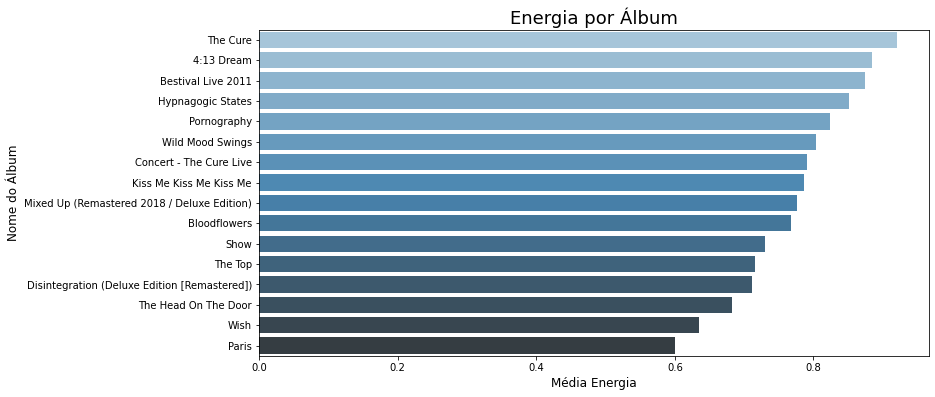

In [157]:
plotar('Energia por Álbum', 'energy', 'album_name', 'Média Energia', 'Nome do Álbum', 'energy')

Observando os álbuns com maiores índices de energia e o Top 10 geral desse aspecto, vemos que, apesar do álbum "The Cure" possuir o maior índice de energia, ele possui apenas uma música no Top 10 geral, enquanto outros álbuns possuem mais músicas aparecendo entre as 10 com mais energia e possuem uma média geral inferior.
Olhando para dentro do álbum e vendo o índice de suas músicas individualmente, podemos observar uma regularidade em todas elas, ou seja, apesar do álbum "The Cure" possui apenas uma entre as 10 mais "enérgicas", todas as suas músicas possuem índices bem próximos e parecidos, fazendo com que a média do álbum se destaque entre os demais. 

### Top 10 músicas com mais energia

In [158]:
top_musicas_sup('energy')

,track_name,album_name,energy
202,It's Over,4:13 Dream,0.998
201,The Scream,4:13 Dream,0.982
178,Us Or Them,The Cure,0.978
151,Club America,Wild Mood Swings,0.978
11,Give Me It - Remastered,The Top,0.973
32,Give Me It - Live Version (1984),Concert - The Cure Live,0.971
200,Sleep When I'm Dead,4:13 Dream,0.970
25,Give Me It [Garden /Eden Studios RS&AA Demo 12...,The Top,0.968
197,Switch,4:13 Dream,0.965
5,A Strange Day - Remastered Version,Pornography,0.964


### Top 10 músicas com menos energia

In [159]:
top_musicas_inf('energy')

,track_name,album_name,energy
132,"Tape - Live At The Palace, Auburn Hills, Michigan",Show,0.284
118,To Wish Impossible Things,Wish,0.297
44,Close To Me,The Head On The Door,0.341
115,Trust,Wish,0.367
120,The Figurehead - Live Paris Version,Paris,0.395
96,The Caterpillar - Flicker Mix,Mixed Up (Remastered 2018 / Deluxe Edition),0.399
140,"Trust - Live At The Palace, Auburn Hills, Mich...",Show,0.400
68,Plainsong,Disintegration (Deluxe Edition [Remastered]),0.428
110,Apart,Wish,0.433
51,If Only Tonight We Could Sleep - 2006 Remaster...,Kiss Me Kiss Me Kiss Me,0.439


# Popularidade

### Popularidade por Álbum

In [160]:
media('album_popularity')

,album_name,album_popularity
4,Disintegration (Deluxe Edition [Remastered]),52.0
15,Wish,52.0
6,Kiss Me Kiss Me Kiss Me,40.0
0,4:13 Dream,38.0
7,Mixed Up (Remastered 2018 / Deluxe Edition),37.0
12,The Head On The Door,36.0
9,Pornography,34.0
10,Show,34.0
2,Bloodflowers,31.0
14,Wild Mood Swings,30.0


O álbum "Disintegration" é o álbum mais popular da banda junto com o "Wish", e ao contrário do Hypnagogic States, ele possui um dos menores índices de partes cantadas em suas músicas, assim como também possui um dos menores índices de energia e junto com o "Wish", ele está entre os 5 álbuns com os menores índices de dançabilidade. 
Além disso, esse álbum é o que possui o maior índice instrumental comparado aos demais.
Porém, esses fatores seriam determinantes para a popularidade do álbum? 


### Gráfico de Popularidade por Álbum

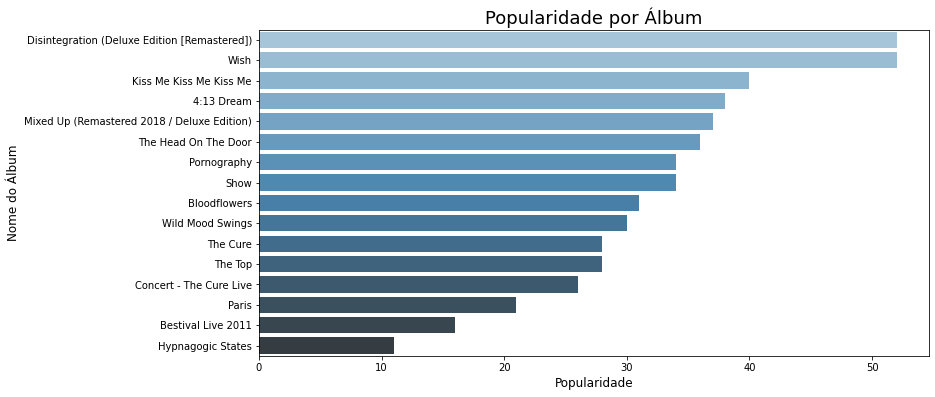

In [161]:
plotar('Popularidade por Álbum', 'album_popularity', 'album_name', 'Popularidade', 'Nome do Álbum', 'album_popularity')

Outro ponto de destaque, é o álbum Hypnagogic States, além de ser o álbum menos popular, podemos ver através dos gráficos que ele também possui um dos maiores índices de partes cantadas nas músicas em comparação aos outros álbuns. 


### Top 10 músicas mais populares

In [162]:
top_musicas_sup('track_popularity')

,track_name,album_name,track_popularity
114,Friday I'm In Love,Wish,62
71,Lovesong,Disintegration (Deluxe Edition [Remastered]),58
69,Pictures Of You,Disintegration (Deluxe Edition [Remastered]),52
73,Lullaby,Disintegration (Deluxe Edition [Remastered]),50
74,Fascination Street,Disintegration (Deluxe Edition [Remastered]),49
116,A Letter To Elise,Wish,45
56,Just Like Heaven - 2006 Remastered Version,Kiss Me Kiss Me Kiss Me,45
44,Close To Me,The Head On The Door,43
118,To Wish Impossible Things,Wish,41
190,Underneath The Stars,4:13 Dream,41


### Top 10 músicas menos populares

In [163]:
top_musicas_inf('track_popularity')

,track_name,album_name,track_popularity
189,The Only One - Remix 65 by 65 Days Of Static,Hypnagogic States,0
183,The Promise,The Cure,0
220,One Hundred Years - Bestival Live 2011,Bestival Live 2011,4
219,The Hungry Ghost - Bestival Live 2011,Bestival Live 2011,4
221,End - Bestival Live 2011,Bestival Live 2011,4
222,Disintegration - Bestival Live 2011,Bestival Live 2011,5
217,Primary - Bestival Live 2011,Bestival Live 2011,5
215,Play For Today - Bestival Live 2011,Bestival Live 2011,5
218,Shake Dog Shake - Bestival Live 2011,Bestival Live 2011,5
212,Push - Bestival Live 2011,Bestival Live 2011,6


### Análise de popularidade das tracks dos álbuns mais populares

#### DISINTEGRATION

In [164]:
musicas_disintegration = discografia.query("album_name=='Disintegration (Deluxe Edition [Remastered])'")[['track_name', 'album_name', 'track_popularity']]
musicas_disintegration = musicas_disintegration.sort_values('track_popularity', ascending = False)

In [165]:
musicas_disintegration

,track_name,album_name,track_popularity
71,Lovesong,Disintegration (Deluxe Edition [Remastered]),58
69,Pictures Of You,Disintegration (Deluxe Edition [Remastered]),52
73,Lullaby,Disintegration (Deluxe Edition [Remastered]),50
74,Fascination Street,Disintegration (Deluxe Edition [Remastered]),49
68,Plainsong,Disintegration (Deluxe Edition [Remastered]),40
77,Disintegration,Disintegration (Deluxe Edition [Remastered]),40
70,Closedown,Disintegration (Deluxe Edition [Remastered]),36
72,Last Dance,Disintegration (Deluxe Edition [Remastered]),35
75,Prayers For Rain,Disintegration (Deluxe Edition [Remastered]),35
76,The Same Deep Water As You,Disintegration (Deluxe Edition [Remastered]),32


In [166]:
media_popularidade_musicas_disintegration = musicas_disintegration.groupby('album_name').mean()[['track_popularity']].reset_index()
media_popularidade_musicas_disintegration

,album_name,track_popularity
0,Disintegration (Deluxe Edition [Remastered]),32.4


#### WISH

In [167]:
musicas_wish = discografia.query("album_name=='Wish'")[['album_name','track_name', 'track_popularity']]
musicas_wish = musicas_wish.sort_values('track_popularity', ascending = False)
musicas_wish

,album_name,track_name,track_popularity
114,Wish,Friday I'm In Love,62
116,Wish,A Letter To Elise,45
118,Wish,To Wish Impossible Things,41
109,Wish,High,40
111,Wish,From The Edge Of The Deep Green Sea,37
108,Wish,Open,36
110,Wish,Apart,30
113,Wish,Doing The Unstuck,30
115,Wish,Trust,30
117,Wish,Cut,28


In [168]:
media_popularidade_musicas_wish = musicas_wish.groupby('album_name').mean()[['track_popularity']].reset_index()
media_popularidade_musicas_wish

,album_name,track_popularity
0,Wish,36


#### KISS ME KISS ME KISS ME

In [169]:
musicas_kissme = discografia.query("album_name=='Kiss Me Kiss Me Kiss Me'")[['track_name', 'album_name', 'track_popularity']]
musicas_kissme = musicas_kissme.sort_values('track_popularity', ascending = False)
musicas_kissme

,track_name,album_name,track_popularity
56,Just Like Heaven - 2006 Remastered Version,Kiss Me Kiss Me Kiss Me,45
53,How Beautiful You Are - 2006 Remastered Version,Kiss Me Kiss Me Kiss Me,35
52,Why Can't I Be You? - 2006 Remastered Version,Kiss Me Kiss Me Kiss Me,32
48,The Kiss - 2006 Remastered Version,Kiss Me Kiss Me Kiss Me,31
49,Catch - 2006 Remastered Version,Kiss Me Kiss Me Kiss Me,30
58,Hot Hot Hot !!! - 2006 Remastered Version,Kiss Me Kiss Me Kiss Me,30
51,If Only Tonight We Could Sleep - 2006 Remaster...,Kiss Me Kiss Me Kiss Me,27
57,All I Want - 2006 Remastered Version,Kiss Me Kiss Me Kiss Me,27
62,The Perfect Girl - 2006 Remastered Version,Kiss Me Kiss Me Kiss Me,27
59,One More Time - 2006 Remastered Version,Kiss Me Kiss Me Kiss Me,26


In [170]:
media_popularidade_musicas_kissme = musicas_kissme.groupby('album_name').mean()[['track_popularity']].reset_index()
media_popularidade_musicas_kissme

,album_name,track_popularity
0,Kiss Me Kiss Me Kiss Me,26.35


#### Dataset dos 3 álbuns mais populares comparando a média de popularidade de suas músicas com a popularidade do álbum

In [171]:
media_popularidade_comparativa = pd.concat([media_popularidade_musicas_disintegration, media_popularidade_musicas_wish, media_popularidade_musicas_kissme]).reset_index()
media_popularidade_comparativa

,index,album_name,track_popularity
0,0,Disintegration (Deluxe Edition [Remastered]),32.40
1,0,Wish,36.00
2,0,Kiss Me Kiss Me Kiss Me,26.35


### Análise da relação das músicas mais populares com os álbuns mais populares
Ao analisar os 3 álbuns mais populares individualmente, vemos a popularidade das músicas que estão dentro deles. Com isso, podemos comparar a popularidade do álbum com a média de popularidade de suas músicas.
O álbum Disintegration possui uma popularidade de 52, enquanto a média de popularidade de suas músicas é de apenas 32,4.
Já o álbum Wish, possui a mesma popularidade do Disintegration, porém, a média de popularidade de suas músicas é de 36.
Por fim, o álbum Kiss Me Kiss Me Kiss Me possui uma popularidade de 40, enquanto a média de popularidade de suas músicas é de 26,3.
Sendo valores tão distantes entre a média de popularidade das músicas e a popularidade do álbum, o que faz esses álbuns serem tão populares comparados aos demais?
Podemos dar uma olhada no Top 10 geral das músicas mais populares do The Cure, ao observar esse ranking, vemos que 8 das 10 músicas mais populares da banda estão dentro dos 3 álbuns mais populares. 
Se fizermos uma média dessas músicas, vemos que:
A média das músicas mais populares do álbum Disintegration que aparecem no Top 10 geral da banda é igual a 52,2 e a média do álbum é 52.
A média das músicas mais populares do álbum Wish que aparecem no Top 10 geral da banda é igual a 49,3 e a média do álbum é 52.
A única música do álbum Kiss Me Kiss Me Kiss Me que aparece no Top 10 possui um índice de popularidade igual a 45, enquanto a popularidade do álbum é 40.
Além disso, vemos também uma certa diferença considerável entre a popularidade dessas músicas e as demais que compõem esses álbuns. Com isso, vemos que a popularidade desses 3 álbuns está muito ligada à popularidade dessas músicas, pois como são as músicas mais ouvidas da banda, consequentemente esses álbuns acabam tendo seu índice de popularidade aumentado em relação aos demais álbuns da banda.
Outra coisa que podemos observar em relação a esses 3 álbuns, é que a média da popularidade dos 3 é bem próxima da média dessas 8 músicas mais populares que constam no Top 10.
A média de popularidade dos 3 álbuns é igual a 48, enquanto a média de popularidade das 8 músicas desses álbuns que constam no Top 10 geral é de 50,2.

# Volume geral em decibéis (loudness)

### Média geral de decibéis por álbum

In [172]:
media('loudness')

,album_name,loudness
0,4:13 Dream,-3.061308
11,The Cure,-4.048182
14,Wild Mood Swings,-4.509643
5,Hypnagogic States,-5.411167
1,Bestival Live 2011,-5.977250
2,Bloodflowers,-6.363111
9,Pornography,-6.935875
6,Kiss Me Kiss Me Kiss Me,-7.554100
13,The Top,-8.185500
7,Mixed Up (Remastered 2018 / Deluxe Edition),-8.584050


### Gráfico de decibéis por álbum

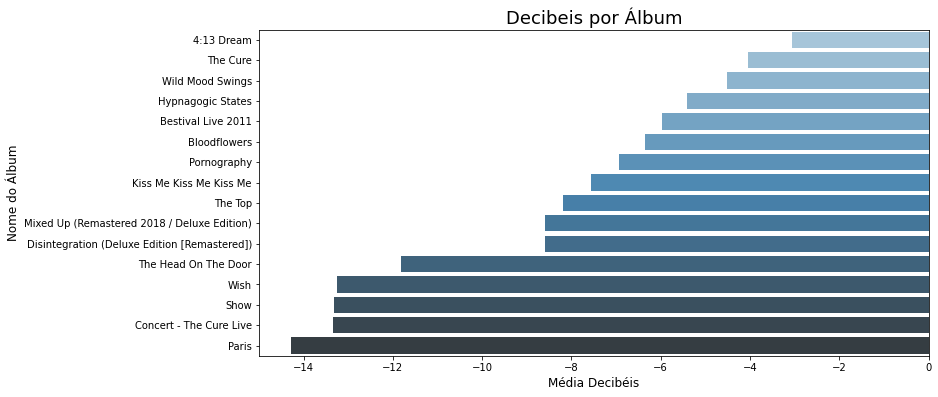

In [173]:
plotar('Decibeis por Álbum', 'loudness', 'album_name', 'Média Decibéis', 'Nome do Álbum', 'loudness')

### Top 10 músicas mais suaves

In [174]:
top_musicas_inf('loudness')

,track_name,album_name,loudness
132,"Tape - Live At The Palace, Auburn Hills, Michigan",Show,-24.265
118,To Wish Impossible Things,Wish,-19.624
44,Close To Me,The Head On The Door,-17.927
120,The Figurehead - Live Paris Version,Paris,-17.460
115,Trust,Wish,-16.847
126,Love Song,Paris,-15.940
110,Apart,Wish,-15.933
124,Apart - Live Paris Version,Paris,-15.354
125,In Your House - Live Paris Version,Paris,-15.174
131,Close To Me - Live Paris Version,Paris,-15.009


### Top 10 músicas menos suaves

In [175]:
top_musicas_sup('loudness')

,track_name,album_name,loudness
202,It's Over,4:13 Dream,-1.378
200,Sleep When I'm Dead,4:13 Dream,-1.677
195,The Real Snow White,4:13 Dream,-1.705
197,Switch,4:13 Dream,-1.786
182,Never,The Cure,-2.161
191,The Only One,4:13 Dream,-2.414
157,Round & Round & Round,Wild Mood Swings,-2.538
196,The Hungry Ghost,4:13 Dream,-2.588
160,Return,Wild Mood Swings,-2.791
201,The Scream,4:13 Dream,-2.841



Antes de analisarmos essa parte, precisamos entender como funciona a medida em decibéis.
Ao olharem para esses índices, muitos devem perguntar: "É possível existirem decibéis negativos? Como fazer para saber se um decibel é negativo ou não?"
Bom, isso acontece porque o decibel é uma medida relativa e não absoluta, ou seja, ele precisa que um ponto de referência seja definido anteriormente para ser medido.
Exemplo:
Se você estabeler um ponto de referência em 10W, todos os sons que ultrapassarem essa potência, terão um índice em decibéis positivos, já os que forem inferiores a ele, terão um índice negativo, porém, quanto maior o índice for positivo, maior será a distorção do sinal sonoro.
Ao usarmos a audição humana como referência, 0 db representam que você está no limiar de nossa habilidade auditiva, sendo assim, os valores negativos representam que aquele som está algumas mais suave que esse limite.
Sendo assim, vemos que o álbum "4:13 Dream", além de possuir o menor índice de suavidade, possui 7 músicas dentro do Top 10 geral de músicas com o maior nível de decibéis. 
Olhando para dentro do álbum, vemos que esse índice se mantém regular em todas as suas músicas, fazendo com que sua média de "suavidade" seja a menor entre todos os álbuns, com uma certa distância do segundo e terceiro. 
Com isso, em termos de suavidade, esse não é um álbum com mudanças significativas em suas músicas, e ao observar outros aspectos, como a "dançabilidade", índice instrumental, índice de detecção de palavras nas músicas e índice de energia, vemos que essa regularidade também aparece, impactando também na popularidade do álbum, fazendo ele ser o 4º álbum mais popular da banda, apesar de ser um dos mais recentes. 

# Acústica (acousticness)

### Calculando a média de índice acústico por álbum

In [176]:
media('acousticness')

,album_name,acousticness
4,Disintegration (Deluxe Edition [Remastered]),0.260964
12,The Head On The Door,0.260002
10,Show,0.226317
14,Wild Mood Swings,0.214075
6,Kiss Me Kiss Me Kiss Me,0.205115
15,Wish,0.188874
3,Concert - The Cure Live,0.158653
13,The Top,0.122983
0,4:13 Dream,0.115023
2,Bloodflowers,0.092112


### Gráfico da média de índice acústico por álbum

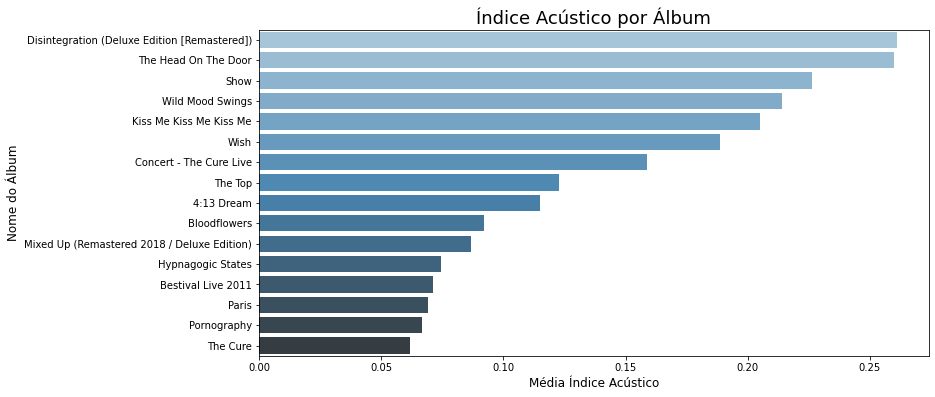

In [177]:
plotar('Índice Acústico por Álbum', 'acousticness', 'album_name', 'Média Índice Acústico', 'Nome do Álbum', 'acousticness')

### Top 10 músicas com maior índice acústico

In [178]:
top_musicas_sup('acousticness')

,track_name,album_name,acousticness
153,The 13th,Wild Mood Swings,0.759
132,"Tape - Live At The Palace, Auburn Hills, Michigan",Show,0.747
136,"Lullaby - Live At The Palace, Auburn Hills, Mi...",Show,0.709
83,Homesick [Band Rehearsal (instrumental)-06/88],Disintegration (Deluxe Edition [Remastered]),0.677
27,Happy The Man [Garden /Eden Studios RS&AA Demo...,The Top,0.642
84,Fear Of Ghosts [Band Rehearsal (instrumental)-...,Disintegration (Deluxe Edition [Remastered]),0.636
43,The Baby Screams,The Head On The Door,0.627
118,To Wish Impossible Things,Wish,0.608
162,Treasure,Wild Mood Swings,0.600
79,Untitled,Disintegration (Deluxe Edition [Remastered]),0.571


### Top 10 músicas com menos índice acústico

In [179]:
top_musicas_inf('acousticness')

,track_name,album_name,acousticness
11,Give Me It - Remastered,The Top,0.000030
25,Give Me It [Garden /Eden Studios RS&AA Demo 12...,The Top,0.000078
21,Sadacic [Olympic Studio RS Demo 12/83],The Top,0.000099
5,A Strange Day - Remastered Version,Pornography,0.000109
91,The Walk - Everything Mix,Mixed Up (Remastered 2018 / Deluxe Edition),0.000121
107,Just Like Heaven - Dizzy Mix 1990,Mixed Up (Remastered 2018 / Deluxe Edition),0.000130
90,Fascination Street - Extended Mix,Mixed Up (Remastered 2018 / Deluxe Edition),0.000183
3,Siamese Twins - Remastered Version,Pornography,0.000298
165,Watching Me Fall,Bloodflowers,0.000299
185,Freakshow - Wolves At The Gate Remix by Jade P...,Hypnagogic States,0.000470


Sobre a acústica, em geral, as músicas do The Cure não possuem índices altos nesse aspecto, sendo assim, as músicas que possuem os maiores índices acabam impulsionando seus respectivos álbuns para o topo do gráfico. Podemos observar que os 4 álbuns que aparecem no Top 10 de músicas com maiores índices de acústica, são também os 4 álbuns com a maior média geral, o que não acontece necessariamente em outros indicadores. 

In [180]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [181]:
%%capture
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('THE_CURE_Analise_da_Discografia.ipynb') # Função para gerar arquivo PDF